# 5 - Validation - Global Installations and Waste Literature Comparisons

This journal uses Irena 2016 Installation Data, Irena 2019 Installation Data, and PV ICE installation data ran through PV_ICE tool with Irena Regular Loss Scenario Weibull and Lifetime parameters, and mostly ideal conditions, and compare it to PV ICE baseline. Output is compared to Garvin Heath & Tim Silverman's paper 2020 Mass of Installed PV and Mass of PV Waste. 

# Benchmark of Results
![Garvin Results](../images_wiki/GARVIN_2020.PNG)


Input is from IRENA projections:
![Input from IRENA_projections](../images_wiki/IRENA_projections.PNG)

Notes on IRENA Data:
- Installation Data < 2010 from D. Jordan (Values too low to digitize properly)
- Installation data >= 2010 from IRENA report (digitized from plot)


Other considerations:
  <ul> 
    <li> Global projected installations from IEA/IRENA (picture below). </li>
    <li> No recycling, no reuse, no repair.  </li>
    <li> 30-year average lifetime with early lifetime failures </li>
    <li> Power to Glass conversion: 76 t/MW </li>
</ul>

In [2]:
import os
from pathlib import Path
import PV_ICE
import matplotlib.pyplot as plt
import pandas as pd

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'Tutorial5')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    

In [3]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("PV_ICE version ", PV_ICE.__version__)

Working on a  Windows 10
Python version  3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
Pandas version  2.1.0
PV_ICE version  v0.2.0+555.ged2ced1


In [4]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (12, 5)

## PV ICE

In [5]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='PV_ICE_base', massmodulefile=r'baseline_modules_mass_World.csv')
r1.scenario['PV_ICE_base'].addMaterials('glass')

r1.createScenario(name='PV_ICE_idealMFG', massmodulefile=r'baseline_modules_mass_World.csv')
r1.scenario['PV_ICE_idealMFG'].addMaterials('glass')
r1.scenario['PV_ICE_idealMFG'].dataIn_m['mod_MFG_eff'] = 100.0
r1.scenario['PV_ICE_idealMFG'].material['glass'].matdataIn_m['mat_MFG_eff'] = 100.0

r1.createScenario(name='Irena_2019', massmodulefile=os.path.join(r1.baselinepath, 'IRENA', 'baseline_modules_mass_World_Irena_2019.csv'))
r1.scenario['Irena_2019'].addMaterial('glass', massmatfile=os.path.join(r1.baselinepath, 'IRENA', 'baseline_material_mass_glass_Irena.csv'))

r1.createScenario(name='A_MassBased', massmodulefile=os.path.join(r1.baselinepath, 'IRENA', 'baseline_modules_mass_World_Irena_2019_A_MassBased.csv'))
r1.scenario['A_MassBased'].addMaterial('glass', massmatfile=os.path.join(r1.baselinepath, 'IRENA', 'baseline_material_mass_glass_Irena_A_MassBased.csv'))

r1.createScenario(name='Irena_2016', massmodulefile=os.path.join(r1.baselinepath, 'IRENA', 'baseline_modules_mass_World_Irena_2016.csv'))
r1.scenario['Irena_2016'].addMaterial('glass', massmatfile=os.path.join(r1.baselinepath, 'IRENA', 'baseline_material_mass_glass_Irena.csv'))

Wambach = False
if Wambach:
    r1.createScenario(name='Wambach2020', massmodulefile=r'C:\Users\sayala\Documents\GitHub\Wambach_Baseline_DonotShare\baseline_modules_World_Wambach2020.csv')
    r1.scenario['Wambach2020'].addMaterial('glass', massmatfile=r'C:\Users\sayala\Documents\GitHub\Wambach_Baseline_DonotShare\baseline_material_glass_Wambach2020.csv')



path = C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\TEMP\Tutorial5
Baseline folder directed to default:  C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\baselines
No energy module file passed. If desired, pass one of the following options:  ['baseline_modules_energy.csv']
Adding Mass AND Energy files for:  glass
No energy module file passed. If desired, pass one of the following options:  ['baseline_modules_energy.csv']
Adding Mass AND Energy files for:  glass
No energy module file passed. If desired, pass one of the following options:  ['baseline_modules_energy.csv']
No energy module file passed. If desired, pass one of the following options:  ['baseline_modules_energy.csv']
No energy module file passed. If desired, pass one of the following options:  ['baseline_modules_energy.csv']


In [6]:
'''
r1.scenario['Garvin_2020'].data['mod_Repairing'] = 0
r1.scenario['Garvin_2020'].data['mod_Repowering'] = 0

r1.scenario['Garvin_2020'].data['mod_degradation'] = 0  # Their calculation does not consider degradation of the fleet.

#We're just calculating total waste so everythign goes to landfill
r1.scenario['Garvin_2020'].data['mod_EOL_collection_eff'] = 0  

# Setting the shape of the weibull 
r1.scenario['Garvin_2020'].data['mod_reliability_t50'] = 45
r1.scenario['Garvin_2020'].data['mod_reliability_t90'] = 50
# Setting Project Lifetime beyond Failures
r1.scenario['Garvin_2020'].data['mod_lifetime'] = 40
''';


In [7]:
r1.scenario['PV_ICE_base'].dataIn_m.keys()

Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_Repair', 'mod_MerchantTail', 'mod_EOL_collection_eff',
       'mod_EOL_pg0_resell', 'mod_EOL_pg1_landfill', 'mod_EOL_pg2_stored',
       'mod_EOL_pg3_reMFG', 'mod_EOL_pg4_recycled', 'mod_EOL_reMFG_yield',
       'mod_EOL_sp_reMFG_recycle', 'mod_EOL_pb1_landfill',
       'mod_EOL_pb2_stored', 'mod_EOL_pb3_reMFG', 'mod_EOL_pb4_recycled'],
      dtype='object')

Plot same plot from Garvin's paper from digitized data input

(0.0, 400.0)

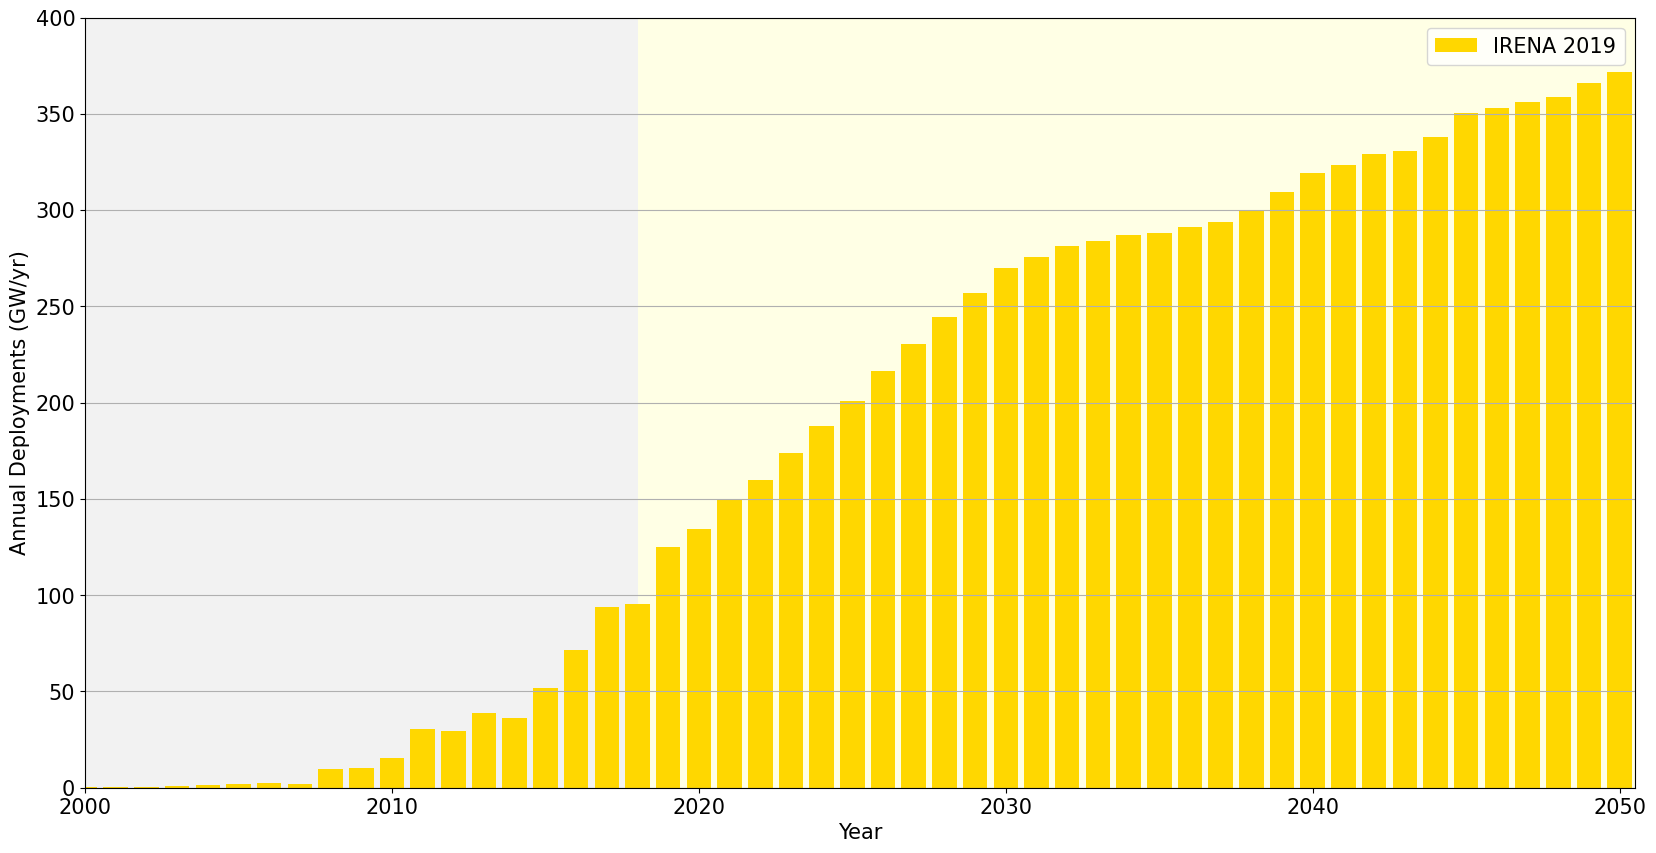

In [8]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(111)
ax1.yaxis.grid()
plt.axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
plt.axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
ax1.bar(r1.scenario['Irena_2019'].dataIn_m['year'], r1.scenario['Irena_2019'].dataIn_m['new_Installed_Capacity_[MW]']/1000, color='gold', label='IRENA 2019')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Annual Deployments (GW/yr)')
plt.xlim([2000, 2050.5])
plt.ylim([0, 400])


(0.0, 400.0)

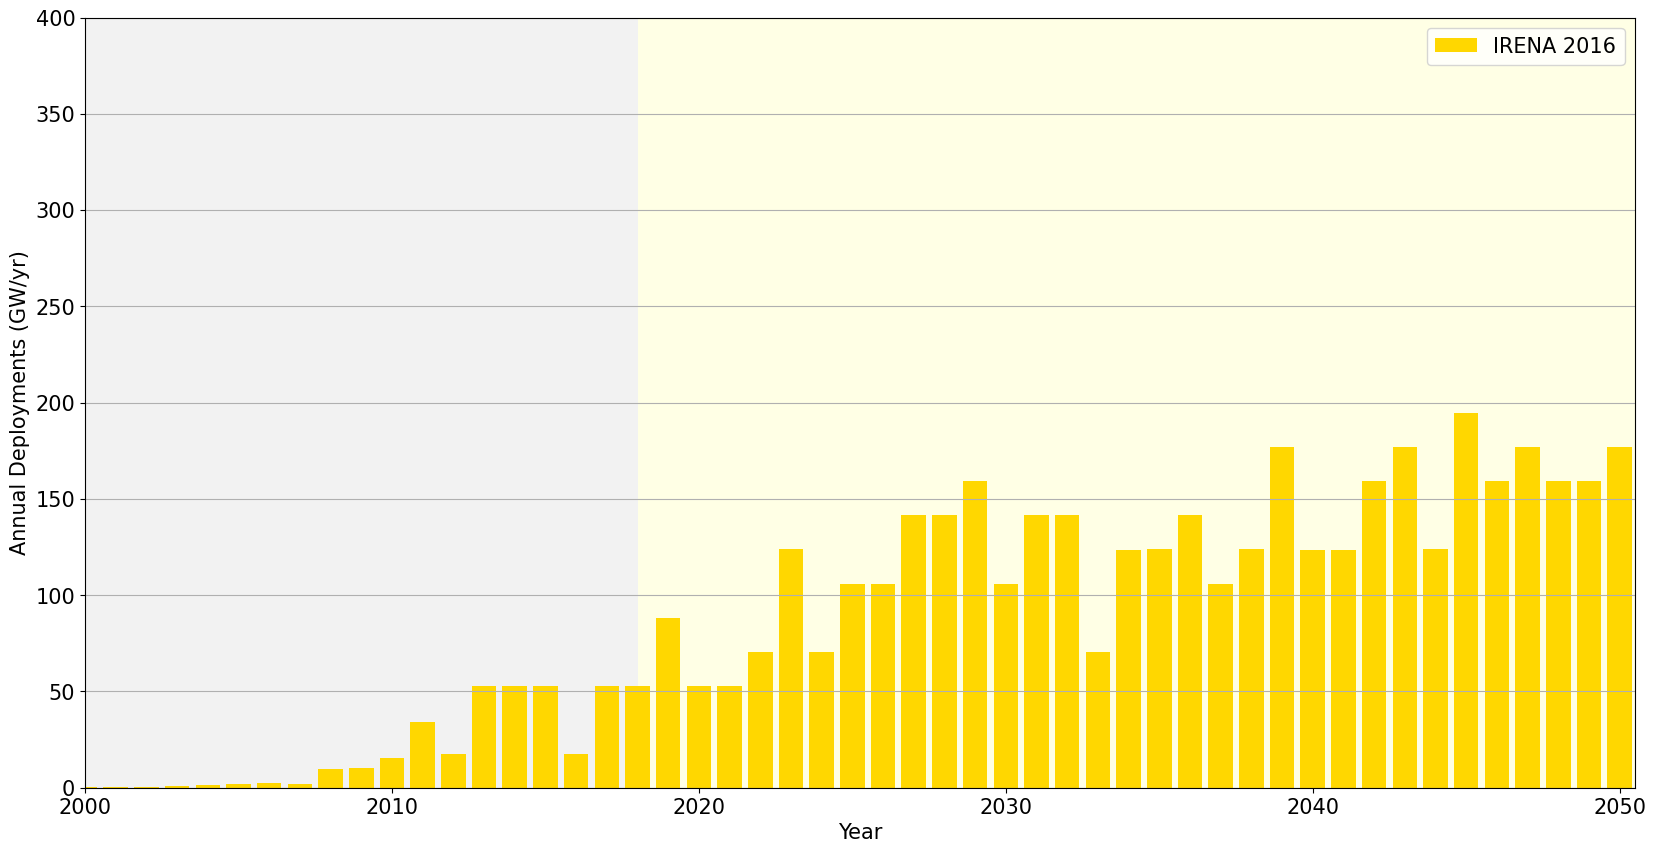

In [9]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(111)
ax1.yaxis.grid()
plt.axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
plt.axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
ax1.bar(r1.scenario['Irena_2016'].dataIn_m['year'], r1.scenario['Irena_2016'].dataIn_m['new_Installed_Capacity_[MW]']/1000, color='gold', label='IRENA 2016')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Annual Deployments (GW/yr)')
plt.xlim([2000, 2050.5])
plt.ylim([0, 400])


#### Adjusting input parameters to represent the inputs from the IRENA analysis:

In [10]:
r1.scenario.keys()

dict_keys(['PV_ICE_base', 'PV_ICE_idealMFG', 'Irena_2019', 'A_MassBased', 'Irena_2016'])

In [11]:
# Selecting only the ones we want with IRENA Assumptions
Irenify = ['Irena_2019', 'A_MassBased', 'Irena_2016'] # 'Wambach2020']
r1.scenMod_IRENIFY(scenarios=Irenify)

Using Irena Regular Loss Assumptions


In [12]:
r1.scenario['PV_ICE_base'].dataIn_m.keys()

Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_Repair', 'mod_MerchantTail', 'mod_EOL_collection_eff',
       'mod_EOL_pg0_resell', 'mod_EOL_pg1_landfill', 'mod_EOL_pg2_stored',
       'mod_EOL_pg3_reMFG', 'mod_EOL_pg4_recycled', 'mod_EOL_reMFG_yield',
       'mod_EOL_sp_reMFG_recycle', 'mod_EOL_pb1_landfill',
       'mod_EOL_pb2_stored', 'mod_EOL_pb3_reMFG', 'mod_EOL_pb4_recycled'],
      dtype='object')

In [13]:
r1.scenario['Irena_2019'].dataIn_m.keys()

Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_Repair', 'mod_MerchantTail', 'mod_EOL_collection_eff',
       'mod_EOL_pg0_resell', 'mod_EOL_pg1_landfill', 'mod_EOL_pg2_stored',
       'mod_EOL_pg3_reMFG', 'mod_EOL_pg4_recycled', 'mod_EOL_reMFG_yield',
       'mod_EOL_sp_reMFG_recycle', 'mod_EOL_pb1_landfill',
       'mod_EOL_pb2_stored', 'mod_EOL_pb3_reMFG', 'mod_EOL_pb4_recycled',
       'weibull_alpha', 'weibull_beta'],
      dtype='object')

In [14]:
r1.calculateMassFlow()

>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE_base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  PV_ICE_idealMFG
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  Irena_2019
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  A_MassBased
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  Irena_2016
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass


In [15]:
r1.scenario['PV_ICE_base'].dataOut_m['WeibullParams'].head(10)

0    {'alpha': 4.173167120209922, 'beta': 16.376973...
1    {'alpha': 4.173167120209922, 'beta': 16.376973...
2    {'alpha': 6.283760582394805, 'beta': 20.141170...
3    {'alpha': 6.283760582394805, 'beta': 20.141170...
4    {'alpha': 6.283760582394805, 'beta': 20.141170...
5    {'alpha': 8.028699553920404, 'beta': 32.447959...
6    {'alpha': 8.028699553920404, 'beta': 32.447959...
7    {'alpha': 8.028699553920404, 'beta': 32.447959...
8    {'alpha': 8.028699553920404, 'beta': 32.447959...
9    {'alpha': 8.028699553920404, 'beta': 32.447959...
Name: WeibullParams, dtype: object

In [16]:
r1.scenario['Irena_2019'].dataOut_m['WeibullParams'].head(10)

0    {'alpha': 5.3759, 'beta': 30.0}
1    {'alpha': 5.3759, 'beta': 30.0}
2    {'alpha': 5.3759, 'beta': 30.0}
3    {'alpha': 5.3759, 'beta': 30.0}
4    {'alpha': 5.3759, 'beta': 30.0}
5    {'alpha': 5.3759, 'beta': 30.0}
6    {'alpha': 5.3759, 'beta': 30.0}
7    {'alpha': 5.3759, 'beta': 30.0}
8    {'alpha': 5.3759, 'beta': 30.0}
9    {'alpha': 5.3759, 'beta': 30.0}
Name: WeibullParams, dtype: object

## Irena Conversion from Mass to Energy --> 
mat_Total_Landfilled is in g, 1 t --> 907.185 kg 
 1 MW --> 76 t conversion for the Mass in PV service.

Querying some of the values for plotting the flags

In [17]:
x2020 = r1.scenario['Irena_2019'].dataIn_m['year'].iloc[25]
y2020 = r1.scenario['Irena_2019'].dataOut_m['Effective_Capacity_[W]'].iloc[25]*76/1000000
t2020 = r1.scenario['Irena_2019'].dataOut_m['Effective_Capacity_[W]'].iloc[25]/(1E12)


x2030 = r1.scenario['Irena_2019'].dataIn_m['year'].iloc[35]
y2030 = r1.scenario['Irena_2019'].dataOut_m['Effective_Capacity_[W]'].iloc[35]*76/1000000
t2030 = r1.scenario['Irena_2019'].dataOut_m['Effective_Capacity_[W]'].iloc[35]/(1E12)

x2050 = r1.scenario['Irena_2019'].dataIn_m['year'].iloc[55]
y2050 = r1.scenario['Irena_2019'].dataOut_m['Effective_Capacity_[W]'].iloc[55]*76/1000000
t2050 = r1.scenario['Irena_2019'].dataOut_m['Effective_Capacity_[W]'].iloc[55]/(1E12)

print(x2050)

2050


In [18]:
if Wambach:
    x2020W = r1.scenario['Wambach2020'].dataIn_m['year'].iloc[40]
    y2020W = r1.scenario['Wambach2020'].dataOut_m['Effective_Capacity_[W]'].iloc[40]*76/1000000
    t2020W = r1.scenario['Wambach2020'].dataOut_m['Effective_Capacity_[W]'].iloc[40]/(1E12)


    x2030W = r1.scenario['Wambach2020'].dataIn_m['year'].iloc[50]
    y2030W = r1.scenario['Wambach2020'].dataOut_m['Effective_Capacity_[W]'].iloc[50]*76/1000000
    t2030W =r1.scenario['Wambach2020'].dataOut_m['Effective_Capacity_[W]'].iloc[50]/(1E12)

    x2050W = r1.scenario['Wambach2020'].dataIn_m['year'].iloc[70]
    y2050W = r1.scenario['Wambach2020'].dataOut_m['Effective_Capacity_[W]'].iloc[70]*76/1000000
    t2050W = r1.scenario['Wambach2020'].dataOut_m['Effective_Capacity_[W]'].iloc[70]/(1E12)
    print("Flags calculated for Wambach")

Calculating Cumulative Waste isntead of yearly waste

Using glass for proxy of the module; glass is ~76% of the module's mass [REF]


In [19]:
cumWaste = r1.scenario['PV_ICE_base'].material['glass'].matdataOut_m['mat_Total_Landfilled'].cumsum()
cumWaste = (cumWaste*100/76)/1000000  # Converting to tonnes

cumWasteIdeal = r1.scenario['PV_ICE_idealMFG'].material['glass'].matdataOut_m['mat_Total_Landfilled'].cumsum()
cumWasteIdeal = (cumWasteIdeal*100/76)/1000000  # Converting to tonnes

cumWaste0 = r1.scenario['Irena_2019'].material['glass'].matdataOut_m['mat_Total_Landfilled'].cumsum()
cumWaste0 = (cumWaste0*100/76)/1000000  # Converting to tonnes

cumWaste1 = r1.scenario['Irena_2016'].material['glass'].matdataOut_m['mat_Total_Landfilled'].cumsum()
cumWaste1 = (cumWaste1*100/76)/1000000  # Converting to tonnes

cumWaste2 = r1.scenario['A_MassBased'].material['glass'].matdataOut_m['mat_Total_Landfilled'].cumsum()
cumWaste2 = (cumWaste2*100/76)/1000000  # Converting to tonnes

if Wambach:
    cumWaste3 = r1.scenario['Wambach2020'].material['glass'].matdataOut_m['mat_Total_Landfilled'].cumsum()
    cumWaste3 = (cumWaste3*100/76)/1000000  # Converting to tonnes

In [20]:
x2020_irena = 2020
y2020_irena = 3.96E+07
t2020_irena = 0.5

x2030_irena = 2030
y2030_irena = 1.24E+08
t2030_irena = 1.6

x2050_irena = 2050
y2050_irena = 3.41E+08
t2050_irena = 4.5

In [20]:
Garvin2020_litCumWaste_X = [2020, 2021.1, 2022.1, 2023.2, 2024.6, 2026.3, 2027.3, 2028.7,
2029.5, 2030.6, 2032.1, 2033.8, 2035.4, 2037.5, 2039.1, 2040.6, 2042, 2044, 2045.5, 2047.3,
2048.9, 2050]

Garvin2020_litCumWaste_Y = [860414.9, 1108341.4, 1383227, 1781800.6, 2295222.2, 3355623.2,
4605006.5, 6319566.5, 7886916, 8951381, 1.15E+07, 1.44E+07, 1.85E+07, 2.31E+07,
2.89E+07, 3.49E+07, 3.96E+07, 4.79E+07, 5.44E+07, 6.57E+07, 7.00E+07, 7.95E+07]

Garvin2020_litMassService_X = [2020, 2021.1, 2022.5, 2024.1, 2025.8, 2027.8, 2030, 2031.8, 2034.5, 
                               2036.9, 2039.5, 2042.6, 2044.9, 2047.4, 2050]

Garvin2020_litMassService_Y = [3.96E+07, 4.79E+07, 5.44E+07, 6.57E+07, 7.95E+07, 1.02E+08,
1.24E+08, 1.45E+08, 1.65E+08, 1.99E+08, 2.19E+08, 2.48E+08, 2.82E+08, 3.10E+08, 3.41E+08]

PLOT:

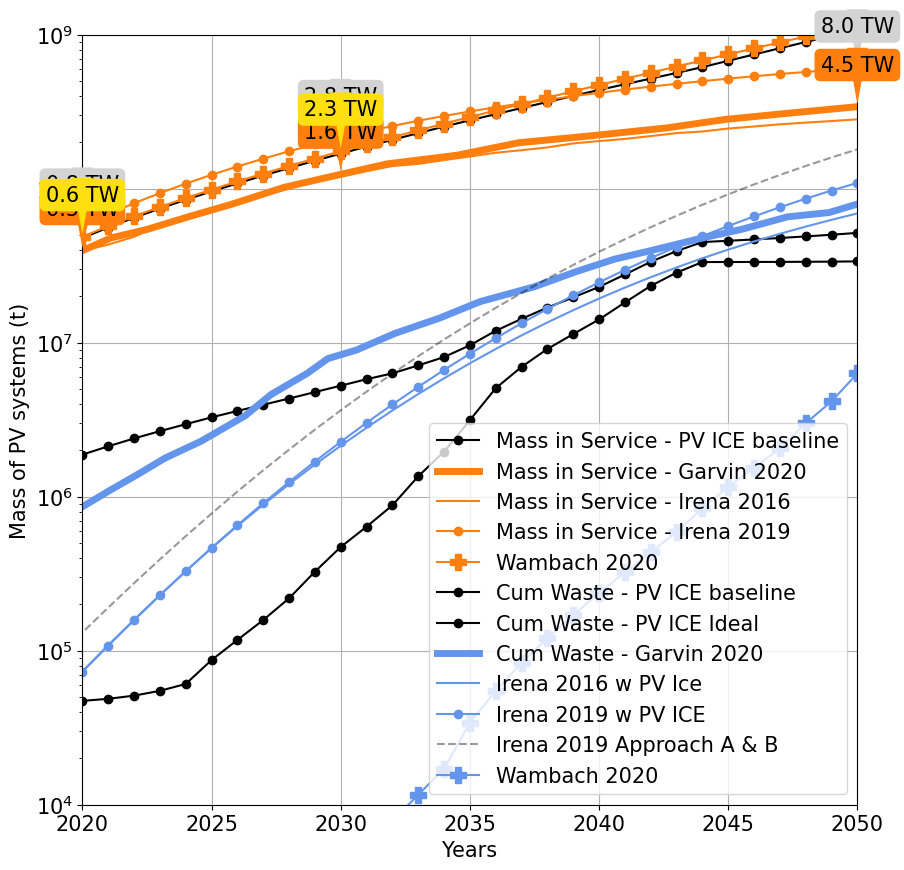

In [21]:
fig = plt.figure(figsize=(10,10))
#color = 'C1', 'cornflowerblue'

#Installs
plt.semilogy(r1.scenario['PV_ICE_base'].dataIn_m.year,r1.scenario['PV_ICE_base'].dataOut_m['Effective_Capacity_[W]']*76/1000000, color='k', marker='o', label='Mass in Service - PV ICE baseline')
plt.semilogy(Garvin2020_litMassService_X, Garvin2020_litMassService_Y, color='C1', linewidth=5.0, label='Mass in Service - Garvin 2020')
plt.semilogy(r1.scenario['Irena_2016'].dataIn_m.year,r1.scenario['Irena_2016'].dataOut_m['Effective_Capacity_[W]']*76/1000000, color='C1', label='Mass in Service - Irena 2016')
plt.semilogy(r1.scenario['Irena_2019'].dataIn_m.year,r1.scenario['Irena_2019'].dataOut_m['Effective_Capacity_[W]']*76/1000000, color='C1', marker='o', label='Mass in Service - Irena 2019')
if Wambach:
    plt.semilogy(r1.scenario['Wambach2020'].dataIn_m.year,r1.scenario['Wambach2020'].dataOut_m['Effective_Capacity_[W]']*76/1000000, color='C1', marker='P', markersize=12, label='Wambach 2020')
    

# Waste
plt.semilogy(r1.scenario['PV_ICE_base'].dataIn_m.year,cumWaste, color='k',  marker='o', label='Cum Waste - PV ICE baseline')
plt.semilogy(r1.scenario['PV_ICE_idealMFG'].dataIn_m.year,cumWasteIdeal, color='k',  marker='o', label='Cum Waste - PV ICE Ideal')
plt.semilogy(Garvin2020_litCumWaste_X, Garvin2020_litCumWaste_Y, color='cornflowerblue', linewidth=5.0, label='Cum Waste - Garvin 2020')
plt.semilogy(r1.scenario['Irena_2016'].dataIn_m.year,cumWaste1, color='cornflowerblue', label='Irena 2016 w PV Ice')
plt.semilogy(r1.scenario['Irena_2019'].dataIn_m.year,cumWaste0, color='cornflowerblue',  marker='o', label='Irena 2019 w PV ICE')
plt.semilogy(r1.scenario['A_MassBased'].dataIn_m.year,cumWaste2, 'k--', alpha=0.4, label='Irena 2019 Approach A & B')
if Wambach:
    plt.semilogy(r1.scenario['Wambach2020'].dataIn_m.year,cumWaste3, color='cornflowerblue',  marker='P', markersize=12, label='Wambach 2020')
    

plt.ylim([1E4, 1E9])
plt.legend()
plt.tick_params(axis='y', which='minor')
plt.xlim([2020,2050])
plt.grid()
plt.ylabel('Mass of PV systems (t)')
plt.xlabel('Years')

offset = (0, 30)

plt.annotate(
    '{:.1f} TW'.format(t2050), (x2050, y2050),
    ha='center', va='center',
    size=15,
    xytext=offset, textcoords='offset points',
    bbox=dict(boxstyle='round', fc='#D3D3D3', ec='none'),
    arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                    fc='#D3D3D3', ec='none',
                    relpos=(0.5, 1.5),
                    )
)

plt.annotate(
    '{:.1f} TW'.format(t2030), (x2030, y2030),
    ha='center', va='center',
    size=15,
    xytext=offset, textcoords='offset points',
    bbox=dict(boxstyle='round', fc='#D3D3D3', ec='none'),
    arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                    fc='#D3D3D3', ec='none',
                    relpos=(0.5, 1.5),
                    )
)


plt.annotate(
    '{:.1f} TW'.format(t2020), (x2020, y2020),
    ha='center', va='center',
    size=15,
    xytext=offset, textcoords='offset points',
    bbox=dict(boxstyle='round', fc='#D3D3D3', ec='none'),
    arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                    fc='#D3D3D3', ec='none',
                    relpos=(0.5, 1.5),
                    )
)


### IRENA

plt.annotate(
    '{:.1f} TW'.format(t2020_irena), (x2020_irena, y2020_irena),
    ha='center', va='center',
    size=15,
    xytext=offset, textcoords='offset points',
    bbox=dict(boxstyle='round', fc='#ff7f0e', ec='none'),
    arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                    fc='#ff7f0e', ec='none',
                    relpos=(0.5, 1.5),
                    )
)

plt.annotate(
    '{:.1f} TW'.format(t2030_irena), (x2030_irena, y2030_irena),
    ha='center', va='center',
    size=15,
    xytext=offset, textcoords='offset points',
    bbox=dict(boxstyle='round', fc='#ff7f0e', ec='none'),
    arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                    fc='#ff7f0e', ec='none',
                    relpos=(0.5, 1.5),
                    )
)

plt.annotate(
    '{:.1f} TW'.format(t2050_irena), (x2050_irena, y2050_irena),
    ha='center', va='center',
    size=15,
    xytext=offset, textcoords='offset points',
    bbox=dict(boxstyle='round', fc='#ff7f0e', ec='none'),
    arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                    fc='#ff7f0e', ec='none',
                    relpos=(0.5, 1.5),
                    )
)


# WAMBACH 2020
if Wambach:
    plt.annotate(
        '{:.1f} TW'.format(t2050W), (x2050W, y2050W),
        ha='center', va='center',
        size=15,
        xytext=offset, textcoords='offset points',
        bbox=dict(boxstyle='round', fc='#ffdf0e', ec='none'),
        arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                        fc='#ffdf0e', ec='none',
                        relpos=(0.5, 1.5),
                        )
    )

    plt.annotate(
        '{:.1f} TW'.format(t2030W), (x2030W, y2030W),
        ha='center', va='center',
        size=15,
        xytext=offset, textcoords='offset points',
        bbox=dict(boxstyle='round', fc='#ffdf0e', ec='none'),
        arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                        fc='#ffdf0e', ec='none',
                        relpos=(0.5, 1.5),
                        )
    )


    plt.annotate(
        '{:.1f} TW'.format(t2020W), (x2020W, y2020W),
        ha='center', va='center',
        size=15,
        xytext=offset, textcoords='offset points',
        bbox=dict(boxstyle='round', fc='#ffdf0e', ec='none'),
        arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                        fc='#ffdf0e', ec='none',
                        relpos=(0.5, 1.5),
                        )
    )

plt.show()




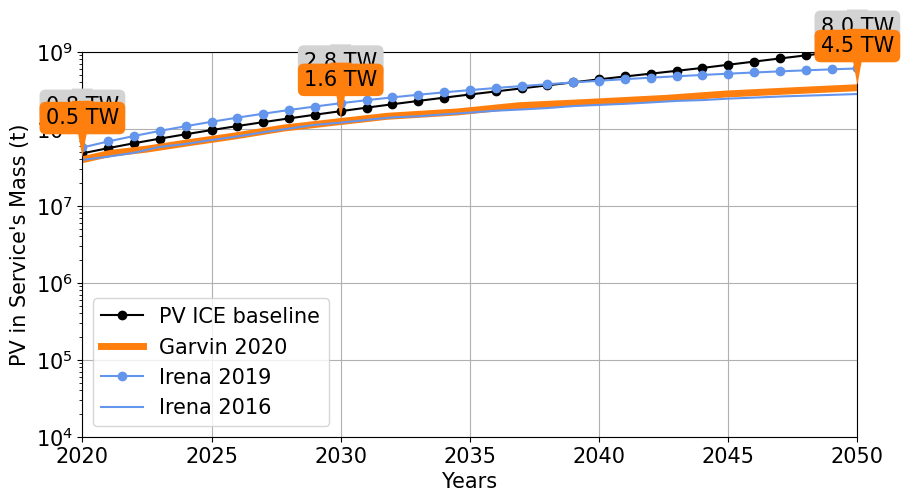

In [22]:
fig = plt.figure(figsize=(10,5))
#color = 'C1', 'cornflowerblue'
Wambach = False

#Installs
plt.semilogy(r1.scenario['PV_ICE_base'].dataIn_m.year,r1.scenario['PV_ICE_base'].dataOut_m['Effective_Capacity_[W]']*76/1000000, color='k', marker='o', label='PV ICE baseline')
plt.semilogy(Garvin2020_litMassService_X, Garvin2020_litMassService_Y, color='C1', linewidth=5.0, label='Garvin 2020')
plt.semilogy(r1.scenario['Irena_2019'].dataIn_m.year,r1.scenario['Irena_2019'].dataOut_m['Effective_Capacity_[W]']*76/1000000, color='cornflowerblue', marker='o', label='Irena 2019')
plt.semilogy(r1.scenario['Irena_2016'].dataIn_m.year,r1.scenario['Irena_2016'].dataOut_m['Effective_Capacity_[W]']*76/1000000, color='cornflowerblue', label='Irena 2016')
if Wambach:
    plt.semilogy(r1.scenario['Wambach2020'].dataIn_m.year,r1.scenario['Wambach2020'].dataOut_m['Effective_Capacity_[W]']*76/1000000, color='C1', marker='P', markersize=12, label='Wambach 2020')
    
   

plt.ylim([1E4, 1E9])
plt.legend()
plt.tick_params(axis='y', which='minor')
plt.xlim([2020,2050])
plt.grid()
plt.ylabel("PV in Service's Mass (t)")
plt.xlabel('Years')
#plt.title('Mass in Service')

offset = (0, 30)

plt.annotate(
    '{:.1f} TW'.format(t2050), (x2050, y2050),
    ha='center', va='center',
    size=15,
    xytext=offset, textcoords='offset points',
    bbox=dict(boxstyle='round', fc='#D3D3D3', ec='none'),
    arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                    fc='#D3D3D3', ec='none',
                    relpos=(0.5, 1.5),
                    )
)

plt.annotate(
    '{:.1f} TW'.format(t2030), (x2030, y2030),
    ha='center', va='center',
    size=15,
    xytext=offset, textcoords='offset points',
    bbox=dict(boxstyle='round', fc='#D3D3D3', ec='none'),
    arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                    fc='#D3D3D3', ec='none',
                    relpos=(0.5, 1.5),
                    )
)


plt.annotate(
    '{:.1f} TW'.format(t2020), (x2020, y2020),
    ha='center', va='center',
    size=15,
    xytext=offset, textcoords='offset points',
    bbox=dict(boxstyle='round', fc='#D3D3D3', ec='none'),
    arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                    fc='#D3D3D3', ec='none',
                    relpos=(0.5, 1.5),
                    )
)


### IRENA

plt.annotate(
    '{:.1f} TW'.format(t2020_irena), (x2020_irena, y2020_irena),
    ha='center', va='center',
    size=15,
    xytext=offset, textcoords='offset points',
    bbox=dict(boxstyle='round', fc='#ff7f0e', ec='none'),
    arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                    fc='#ff7f0e', ec='none',
                    relpos=(0.5, 1.5),
                    )
)

plt.annotate(
    '{:.1f} TW'.format(t2030_irena), (x2030_irena, y2030_irena),
    ha='center', va='center',
    size=15,
    xytext=offset, textcoords='offset points',
    bbox=dict(boxstyle='round', fc='#ff7f0e', ec='none'),
    arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                    fc='#ff7f0e', ec='none',
                    relpos=(0.5, 1.5),
                    )
)

plt.annotate(
    '{:.1f} TW'.format(t2050_irena), (x2050_irena, y2050_irena),
    ha='center', va='center',
    size=15,
    xytext=offset, textcoords='offset points',
    bbox=dict(boxstyle='round', fc='#ff7f0e', ec='none'),
    arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                    fc='#ff7f0e', ec='none',
                    relpos=(0.5, 1.5),
                    )
)


# WAMBACH 2020
if Wambach:
    plt.annotate(
        '{:.1f} TW'.format(t2050W), (x2050W, y2050W),
        ha='center', va='center',
        size=15,
        xytext=offset, textcoords='offset points',
        bbox=dict(boxstyle='round', fc='#ffdf0e', ec='none'),
        arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                        fc='#ffdf0e', ec='none',
                        relpos=(0.5, 1.5),
                        )
    )

    plt.annotate(
        '{:.1f} TW'.format(t2030W), (x2030W, y2030W),
        ha='center', va='center',
        size=15,
        xytext=offset, textcoords='offset points',
        bbox=dict(boxstyle='round', fc='#ffdf0e', ec='none'),
        arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                        fc='#ffdf0e', ec='none',
                        relpos=(0.5, 1.5),
                        )
    )


    plt.annotate(
        '{:.1f} TW'.format(t2020W), (x2020W, y2020W),
        ha='center', va='center',
        size=15,
        xytext=offset, textcoords='offset points',
        bbox=dict(boxstyle='round', fc='#ffdf0e', ec='none'),
        arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                        fc='#ffdf0e', ec='none',
                        relpos=(0.5, 1.5),
                        )
    )

plt.show()




Text(0.5, 1.0, '')

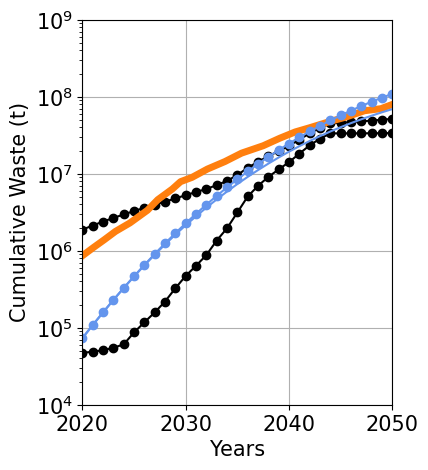

In [23]:
fig = plt.figure(figsize=(4,5))
#color = 'C1', 'cornflowerblue'
Wambach = False

# Waste
plt.semilogy(r1.scenario['PV_ICE_base'].dataIn_m.year,cumWaste, color='k',  marker='o', label='PV ICE baseline')
plt.semilogy(r1.scenario['PV_ICE_idealMFG'].dataIn_m.year,cumWasteIdeal, color='k',  marker='o', label='PV ICE Ideal')
plt.semilogy(Garvin2020_litCumWaste_X, Garvin2020_litCumWaste_Y, color='C1', linewidth=5.0, label='Garvin 2020')
plt.semilogy(r1.scenario['Irena_2016'].dataIn_m.year,cumWaste1, color='cornflowerblue', label='Irena 2016')
plt.semilogy(r1.scenario['Irena_2019'].dataIn_m.year,cumWaste0, color='cornflowerblue',  marker='o', label='Irena 2019')
#plt.semilogy(r1.scenario['A_MassBased'].data.year,cumWaste2, 'k--', alpha=0.4, label='Irena 2019 Approach A & B')
if Wambach:
    plt.semilogy(r1.scenario['Wambach2020'].dataIn_m.year,cumWaste3, color='cornflowerblue',  marker='P', markersize=12, label='Wambach 2020')

plt.ylim([1E4, 1E9])
#plt.legend()
plt.tick_params(axis='y', which='minor')
plt.xlim([2020,2050])
plt.grid()
plt.ylabel('Cumulative Waste (t)')
plt.xlabel('Years')
plt.title("")